<a href="https://colab.research.google.com/github/mindgarage/very-deep-learning-wise2324/blob/main/tutorials/Exercise_0_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Basics Tutorial

This tutorial is a compilation of essential topics adapted from the [DeepLearningForNLPInPytorch tutorial](https://github.com/rguthrie3/DeepLearningForNLPInPytorch/blob/master/Deep%20Learning%20for%20Natural%20Language%20Processing%20with%20Pytorch.ipynb) and the [Official PyTorch tutorials](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py).

## Installation

Before diving into the tutorial, let's make sure you've got PyTorch installed. It can be installed using either `conda` or `pip` with the following commands:

- `conda install pytorch-c pytorch`
- `pip3 install torch`

You can learn more about installation and getting started [here](https://pytorch.org/get-started/locally/).


In [53]:
import torch
print(torch.__version__)

2.1.0+cu118


## 1. Tensors: The Building Blocks

Tensors are essentially multi-dimensional arrays that serve as the core data structure in PyTorch. If you are familiar with NumPy, tensors are akin to ndarrays, but with the additional capability to be used on GPUs for faster computation.

### 1.1 Creating Tensors from Data
You can easily create a tensor from existing data, such as Python lists or NumPy arrays.

In [54]:
# 1-D data example
tensor = torch.Tensor([1.0, 2.0, 3.0])

# 2-D data example
tensor = torch.Tensor([[1., 2., 3.], [4., 5., 6.]])

# 3-D data example
tensor = torch.Tensor([[[1.,2.], [3.,4.]], [[5.,6.], [7.,8.]]])

**Why it Matters**: Creating tensors from data is often the first step in preparing your dataset for machine learning models.

### 1.2 Initializing an Empty Tensor
An uninitialized tensor is essentially a block of memory allocated for tensor storage but not yet populated with values.


In [55]:
x = torch.empty(2, 3)

**Why it Matters**: Uninitialized tensors can be useful when you need a tensor of a certain shape but don't yet know the values it should contain.

### 1.3 Randomly Initialized Tensors
Sometimes, you might need tensors with random values, often as initial values for model parameters.

**Uniform Distribution:**

In [56]:
x = torch.rand(2, 3) # Values between 0 and 1

**Normal Distribution:**

In [57]:
x = torch.randn(2, 3) # Mean 0, standard deviation 1

**Why it Matters**: Randomly initialized tensors are crucial for techniques like weight initialization in neural networks.

### 1.4 Tensors with Specific Values
Creating tensors filled with zeros or ones is a common task in both data preprocessing and model initialization.

**Matrix of Zeros:**

In [58]:
x = torch.zeros(2, 3)


**Matrix of Ones:**

In [59]:
x = torch.ones(2, 3, dtype=torch.long)

**Why it Matters**: Matrices of zeros or ones are commonly used for tasks like one-hot encoding, initializing biases, or creating masks.

### 1.5 Create Tensor Based on Existing Tensor
Creating a new tensor with the same properties (like dtype, device, etc.) as an existing tensor is a frequent requirement.

In [60]:
x = x.new_ones(2, 3, dtype=torch.double)  # new_* methods take sizes
print(x)

x = torch.ones_like(x)  # Creates a tensor of ones with the same shape as x
x = torch.randn_like(x, dtype=torch.float)  # Overrides the dtype while keeping the shape
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-1.9495, -1.2441,  1.5035],
        [ 0.2017, -0.9622,  0.6746]])


**Why it Matters**: Using the existing tensor's properties can ensure that your new tensor will be compatible in subsequent operations, reducing the chance of errors due to incompatible shapes, data types, or devices.

### 1.6 Size of a Tensor
Knowing the shape or dimensions of a tensor is crucial for debugging and for performing various tensor operations.

In [61]:
# Various ways to find the size of a tensor
print(tensor.size())
print(tensor.shape)

torch.Size([2, 2, 2])
torch.Size([2, 2, 2])


**Why it Matters**: Many machine learning models have strict requirements on the dimensions of their input data. Knowing how to find and understand these dimensions is crucial.

### 1.7 Operations with Tensors
Performing operations between tensors is a fundamental part of building neural networks.

In [62]:
x = torch.rand(8)
y = torch.rand(8)

# Addition
z = x + y
print(z)

# Using PyTorch's built-in functions
print(torch.add(x, y))
print(torch.subtract(x, y))

# In-place addition (modifies the tensor directly)
y.add_(x)
print(y)

tensor([0.7246, 1.0968, 0.7517, 1.7262, 0.6855, 0.3973, 0.7661, 1.7565])
tensor([0.7246, 1.0968, 0.7517, 1.7262, 0.6855, 0.3973, 0.7661, 1.7565])
tensor([-0.1198, -0.5711,  0.4086,  0.1748,  0.5760,  0.2236, -0.0963,  0.1628])
tensor([0.7246, 1.0968, 0.7517, 1.7262, 0.6855, 0.3973, 0.7661, 1.7565])


**Note**: In-place operations (those that modify the tensor directly) are post-fixed with an _.

**Why it Matters**: Neural networks are essentially computations that modify tensor values. Mastering tensor operations is crucial for understanding and creating machine learning models.

### 1.8 Reshaping Tensors
Reshaping tensors is often necessary to get them into the shape that you need for specific operations or layer inputs.

In [63]:
y = x.view(2, -1)  # Reshapes to 2 rows, infers the number of columns
z = x.view(-1, 8)  # Reshapes to 8 columns, infers the number of rows

**Why it Matters**: Some neural network layers expect inputs to have a specific shape. Reshaping tensors is crucial for feeding data into these layers.

### 1.9 Converting to and from NumPy
Switching between PyTorch Tensors and NumPy arrays is seamless and useful for integrating PyTorch into a broader Python data ecosystem.


In [65]:
import numpy as np

# Converting a PyTorch Tensor to a NumPy array
a = torch.ones(5)
b = a.numpy()

# Changes in the Tensor reflect in the NumPy array and vice versa
a.add_(1)
print(a)
print(b)

# Converting a NumPy array to a PyTorch Tensor
a = np.ones(5)
b = torch.from_numpy(a)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


**Note**: The Torch Tensor and NumPy array share the same memory if the tensor is on the CPU.

**Why it Matters**: Knowing how to convert between PyTorch Tensors and NumPy arrays allows for easier data manipulation and usage of other Python libraries that operate on NumPy arrays.

### 1.10. CUDA Tensors
CUDA Tensors are essentially regular PyTorch Tensors, but they utilize the GPU for computation, leading to potential speed-ups for your code. The ability to perform operations on the GPU rather than the CPU can be crucial for large-scale data tasks.

**Enabling GPU on Colab Notebook**: If you are using a Colab notebook, you can enable GPU support:

1. Go to Edit -> Notebook Settings
2. Under Hardware Accelerator, select GPU.

In [66]:
# This code checks whether CUDA is available on your machine
import torch
print("Is CUDA available?", torch.cuda.is_available())

# If CUDA is available, we define a PyTorch device object that uses CUDA
if torch.cuda.is_available():
    device = torch.device("cuda")  # a CUDA device object
    x = torch.Tensor([1.0, 2.0, 3.0])
    y = torch.ones_like(x, device=device)  # Creates tensor on GPU
    x = x.to(device)  # Moves x to GPU
    z = x + y
    print("Tensor operations on GPU:", z)
    print("Tensor operations back on CPU:", z.to("cpu", torch.double))  # Moves z to CPU and also changes dtype

Is CUDA available? True
Tensor operations on GPU: tensor([2., 3., 4.], device='cuda:0')
Tensor operations back on CPU: tensor([2., 3., 4.], dtype=torch.float64)


**Why it Matters**: Utilizing the GPU can significantly speed up code execution for large-scale linear algebra operations and neural network computations, especially for deep learning models with many layers or a large number of parameters.

**Note**: Moving tensors between the CPU and GPU is not free in terms of computational cost. Ensure that you perform as many operations as possible on the GPU before moving the result back to the CPU to minimize this overhead.

## 2. Autograd: Automatic Differentiation
Autograd is PyTorch's automatic differentiation library. Understanding how Autograd works is crucial for training deep learning models effectively and efficiently.

### 2.1 Define-By-Run Paradigm
Autograd is unique because it's a "define-by-run" framework. In other words, the way you write your code defines the computation graph. This is more flexible than "define-and-run" frameworks, allowing you to change the way you compute gradients on-the-fly.

### 2.2 Tensor Tracking
A PyTorch `Tensor` has an attribute called `requires_grad`. If you set this attribute to `True`, Autograd will start to track tensor operations to build up a computation graph.

In [67]:
# Create a tensor and set requires_grad=True to track computation with it
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

### 2.3 Backward Propagation
Once you've completed your computations, you can call the `.backward()` method to compute all the gradients automatically. The gradients will be stored in the `.grad` attribute of the respective tensors.

In [68]:
# Compute some function of x
y = x * 2
z = y.mean()

# Compute gradients
z.backward()

# Check gradients
print(x.grad)

tensor([0.6667, 0.6667, 0.6667])


### 2.4 Detaching Tensors
If you want to remove a tensor from the computation graph, you can call `.detach()`. This is particularly useful when you want to freeze parts of your model, or you have computed some values that you will need later but don't want gradients for.

In [69]:
# Detach y from computation graph
y_detached = y.detach()

### 2.5 Context Manager for Non-tracking
Sometimes you want to perform operations that you don't want to track. For instance, during model evaluation, it's often unnecessary to track gradients. To stop tracking history temporarily, you can wrap your code inside a `with torch.no_grad():` block.

In [70]:
with torch.no_grad():
    # Computation here will not be tracked
    y = x * 2
    print(y)

tensor([2., 4., 6.])


**Key Points**:
- **.requires_grad**: To enable tracking, set this attribute to `True`.
- **.backward()**: Initiates backward pass and computes gradients.
- **.grad**: Contains computed gradients.
- **.detach()**: Removes tracking.
- **torch.no_grad()**: Temporarily disables gradient tracking.

## Datasets and DataLoaders

In [ ]:
x_train = np.random.randn(224, 3)
y_train = np.random.randn(224)
print(len(x_train))
print(len(y_train))

224
224


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  """ A custom dataset. """

  def __init__(self, x_tensor, y_tensor):
    self.x = x_tensor
    self.y = y_tensor

  def __len__(self):
    """ Return size of the dataset. """
    return len(self.x)

  def __getitem__(self, index):
    """ Get an item from the dataset. """
    return self.x[index], self.y[index]

x_tensor = torch.from_numpy(x_train).float()
y_tensor = torch.from_numpy(y_train).float()

train_data = CustomDataset(x_tensor, y_tensor)
print(len(train_data))

train_loader = DataLoader(train_data, batch_size=8,
                          shuffle=True, num_workers=4)
print(len(train_loader))

224
28


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


## Modules

In [ ]:
import torch.nn as nn

class CustomNetwork(nn.Module):
  def __init__(self):
    """ Create the network architecture. """
    super().__init__()
    self.layer1 = nn.Linear(3, 64)
    self.layer2 = nn.Linear(64, 768)
    self.act = nn.ReLU()

  def forward(self, x):
    """ Forward pass. """
    x = self.layer1(x)
    x = self.act(self.layer2(x))
    return x


net = CustomNetwork()
print(net)

x = torch.rand((224, 3))
out = net(x)
print(out.shape)

CustomNetwork(
  (layer1): Linear(in_features=3, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=768, bias=True)
  (act): ReLU()
)
torch.Size([224, 768])


## Example Task: CIFAR-10 Classification

In this section, we will see a working example of image classification on the CIFAR dataset. You can learn more about the dataset here: https://huggingface.co/datasets/cifar10.

In [ ]:
import torch
import torchvision
from torchvision import transforms

### Define the Dataset and DataLoader

In [ ]:
# Define transforms (data preprocessing)
# https://pytorch.org/vision/0.8/transforms.html
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), # mean
                         (0.5, 0.5, 0.5)) # std
])

# transfomed_image = transform(image)

# Create the dataset
# We are using CIFAR10, which is provided by torchvision, so we
# do not need to define our own class.
# https://pytorch.org/vision/0.8/datasets.html
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
# validation_set for hyperparameter tuning
# 70 / 10 / 20 for train/val/test
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# Create the data loader (to load data in batches)
batch_size = 4
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

100%|██████████| 170498071/170498071 [00:04<00:00, 36696683.14it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Visualize a Data Sample

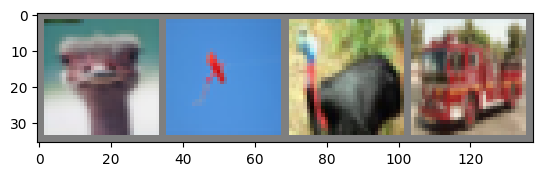

bird  plane bird  truck


In [ ]:
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### Define our Network Architecture

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 3 is number of channels in RGB input
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) # 10 is number of classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create the network
net = Net()

### Define Loss Function and Optimizer

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() # loss function / criterion
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # 1e-3 is a good default

In [ ]:
# torch.cuda.is_available() # check if a gpu is available or not

In [ ]:
# move network to gpu
# net = net.to(torch.device('cuda'))

### Train the Network using PyTorch

In [ ]:
for epoch in range(3):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # inputs = inputs.to(torch.device('cuda'))
        # labels = labels.to(torch.device('cuda'))

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # validation set
        # with torch.no_grad():
        #     pass

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.305
[1,  4000] loss: 2.304
[1,  6000] loss: 2.304
[1,  8000] loss: 2.304
[1, 10000] loss: 2.304
[1, 12000] loss: 2.303
[2,  2000] loss: 2.304
[2,  4000] loss: 2.305
[2,  6000] loss: 2.304
[2,  8000] loss: 2.303
[2, 10000] loss: 2.304
[2, 12000] loss: 2.304
[3,  2000] loss: 2.305
[3,  4000] loss: 2.304
[3,  6000] loss: 2.304
[3,  8000] loss: 2.305
[3, 10000] loss: 2.303
[3, 12000] loss: 2.303
Finished Training


In [ ]:
# PATH = './cifar_net.pth'
# torch.save(net.state_dict(), PATH)

### Predict on Test Set

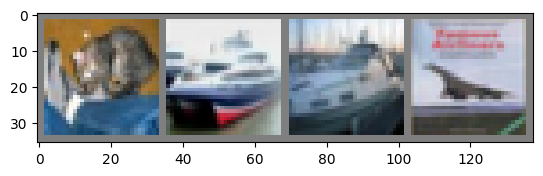

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
# net = Net()
# net.load_state_dict(torch.load(PATH))

In [ ]:
outputs = net(images)
print(outputs.shape)
outputs

torch.Size([4, 10])


tensor([[-1.2973, -2.8428,  0.1774,  3.0017, -0.1940,  2.5056,  1.9468,  0.0463,
         -2.0822, -1.7077],
        [ 6.1545,  6.8141, -1.3117, -4.0249, -2.0108, -4.8753, -3.3173, -4.9225,
          5.3866,  2.7937],
        [ 2.4970,  3.0559, -0.4060, -1.6581, -0.8557, -2.2746, -1.4176, -1.4669,
          1.7733,  1.2676],
        [ 3.7357,  1.8307,  1.2786, -1.8792,  0.0678, -3.2548, -2.2722, -2.4486,
          2.3895, -0.8398]], grad_fn=<AddmmBackward0>)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   car   plane


### Compute Accuracy on Test Set

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


## Beyond PyTorch

PyTorch offers robust capabilities for machine learning, but there are also a variety of third-party libraries that can make your workflow simpler and more efficient.

### PyTorch Lightning

**What it does**: PyTorch Lightning is a lightweight PyTorch wrapper that helps researchers and engineers organize their PyTorch code, making it more readable and maintainable. It abstracts away most of the boilerplate code, allowing users to focus more on the research part.

**Installation**: `pip install pytorch-lightning`

**Quick Fact**: You can convert your vanilla PyTorch code to Lightning by mainly reorganizing it, without any rewrite of your model, dataloaders, or optimizers.

### TorchMetrics

**What it does**: TorchMetrics is a PyTorch-native library for evaluation metrics, designed to work seamlessly with PyTorch Lightning and native PyTorch. It offers easy-to-use APIs for many evaluation metrics relevant to various tasks.

**Installation**: `pip install torchmetrics`

**Quick Fact**: TorchMetrics is designed for distributed training, offering optimized metric calculations across multiple GPUs or nodes.

### TorchInfo

**What it does**: TorchInfo provides a detailed information summary of PyTorch models, similar to TensorFlow's `model.summary()`. It gives layer-by-layer architectural details and the number of parameters.

**Installation**: `pip install torchinfo`

**Quick Fact**: You can easily visualize the layers, shapes, and parameter counts in your PyTorch model, aiding in debugging and optimization.

### Weights & Biases

**What it does**: Weights & Biases helps you keep track of your machine learning experiments. It provides tools for logging metrics, visualizing results, and comparing different runs.

**Installation**: `pip install wandb`

**Quick Fact**: With just a few lines of code, you can log training metrics, hyperparameters, and even output images or graphs to a web dashboard.

### Hugging Face Transformers

**What it does**: Provides pre-trained models and training scripts for Natural Language Processing (NLP) tasks like translation, text summarization, and more, all designed to be compatible with PyTorch.

**Installation**: `pip install transformers`

**Quick Fact**: Hugging Face's model hub allows you to easily download and fine-tune pre-trained models for a wide variety of NLP tasks.

### ONNX (Open Neural Network Exchange)

**What it does**: ONNX allows you to interchange models between various deep learning frameworks, making it easier to deploy models.

**Installation**: `pip install onnx`

**Quick Fact**: PyTorch provides native support for exporting models to the ONNX format, making it more versatile for multi-platform deployments.